## Week 4 ##

This week, we want you to get comfortable with numerical differentiation without using external packages, and with error handling.

We will make use of a spin system: a system with two possible energy values for each particle.
We choose a system of **N** particles with spin, in a magnetic field **B**, where spin is the only degree of freedom.

The particle's spin $s_{i}$ can take the values $ \pm \frac{1}{2}$.

The system's total energy $E$ can be obtained as the sum of the energy of every single component, which in turn can be obtained from it's spin: $E_{i}=2 \mu_{B}B s_{i}$

 $$ E= 2 \mu_{B}B \sum_{n=i}^{} s_{i} \tag{Equation 1.}$$
 
 If **n** particles have the quantum number $s=\frac{1}{2}$, then $N-n$ have the quantum number $s=-\frac{1}{2}$
 
 The total energy can then be evaluated as $$E= \mu_{B}B(2n-N)  \tag{Equation 2.}$$
 
Making use of the microcanonical partition function $\Omega$, we can arrive at an expression for the entropy $S$ for such a system: $$ S = k_{B}N\log(\frac{N}{N-n})+k_{B}n\log(\frac{N-n}{n})  \tag{Equation 3.}$$


Finally, the temperature can be calculated via the definition: $$ \frac{1}{T}=\frac{\partial S}{\partial E}  \tag{Equation 4.}$$

### Task 1: ###

 Here, write two functions:
 -   This first one, called **entropy**
 
     *Inputs:* **N**
        
     *Outputs*: An array called **entropy_N**, with the entropy as a function of **n** (particles with spin up) from 0 to N.
        
-    The second function, called **temperature** 

     *Inputs*: The output from **entropy**
        
      *Outputs*: An array **T** of length N-1, of the temperature as a function of  **n** (the numebr of spin-up particles)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
kb=8.617e-5  # Boltzmanm const in Ev Kˆ-1
B=1

In [3]:
def entropy(n_capital):
    n = np.arange(0, n_capital + 1, 1)
    n_diff = n_capital - n
    entropy_n_capital = np.nan_to_num(kb * n_capital * np.log(n_capital / n_diff) + kb * n * np.log(n_diff / n))
    return entropy_n_capital

In [4]:
def temperature(entropy_n_capital):
    t = np.zeros(len(entropy_n_capital))
    e = np.zeros(len(entropy_n_capital))
    mu_b = 5.788e-5
    for idx, val in enumerate(entropy_n_capital):
        e[idx] = mu_b * B * (2 * (len(entropy_n_capital) - (idx + 1)) - (idx + 1))
        if idx < len(entropy_n_capital) - 1:
            t[idx] = (e[idx + 1] - e[idx]) / (entropy_n_capital[idx + 1] - entropy_n_capital[idx])
        else:
            t[idx] = t[idx - 1]
    return t

### Task 2: ###
 Submit two plots:
-    First: a plot of the entropies as a function of **n** (the numebr of spin-up particles) for systems of particles between 10<N<30.
-    Second: a plot of the temperatures as a function of number **n** (the number of spin-up particles) for the aforementioned systems.

/var/folders/0n/qlsqbkfj2dl5v4_hj0l1288h0000gn/T/ipykernel_98186/463903956.py:4: RuntimeWarning: divide by zero encountered in divide
  entropy_n_capital = np.nan_to_num(kb * n_capital * np.log(n_capital / n_diff) + kb * n * np.log(n_diff / n))
/var/folders/0n/qlsqbkfj2dl5v4_hj0l1288h0000gn/T/ipykernel_98186/463903956.py:4: RuntimeWarning: divide by zero encountered in log
  entropy_n_capital = np.nan_to_num(kb * n_capital * np.log(n_capital / n_diff) + kb * n * np.log(n_diff / n))
/var/folders/0n/qlsqbkfj2dl5v4_hj0l1288h0000gn/T/ipykernel_98186/463903956.py:4: RuntimeWarning: invalid value encountered in multiply
  entropy_n_capital = np.nan_to_num(kb * n_capital * np.log(n_capital / n_diff) + kb * n * np.log(n_diff / n))
/var/folders/0n/qlsqbkfj2dl5v4_hj0l1288h0000gn/T/ipykernel_98186/463903956.py:4: RuntimeWarning: invalid value encountered in add
  entropy_n_capital = np.nan_to_num(kb * n_capital * np.log(n_capital / n_diff) + kb * n * np.log(n_diff / n))


Text(0.5, 0.01, '$N$')

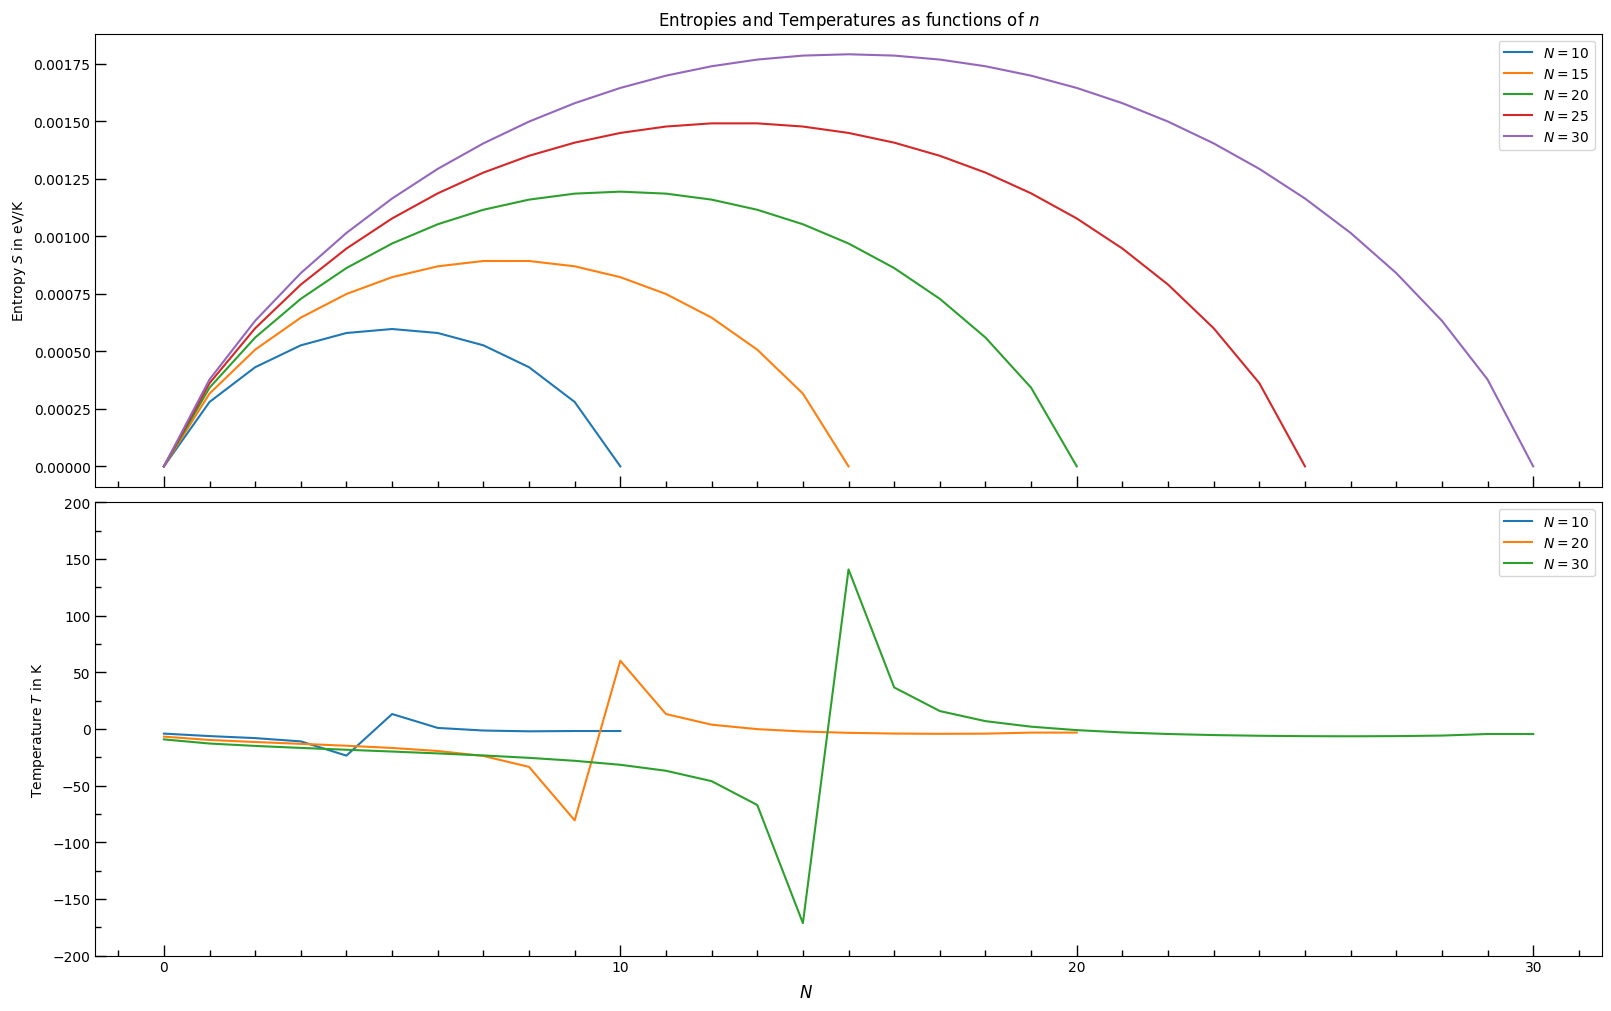

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=[16, 10], constrained_layout=True, sharex=True)

N = [10, 15, 20, 25, 30]

for idx, num in enumerate(N):
    ax1.plot(np.arange(0, N[idx] + 1, 1), entropy(num), label=r"$N=$"+f"{num:.0f}")

for idx, num in enumerate(N):
    if idx % 2 == 0:
        ax2.plot(np.arange(0, num + 1, 1), temperature(entropy(num)), label=r"$N=$"+f"{num:.0f}")
        ax2.set_ylim(-200, 200)
    

ax1.title.set_text("Entropies and Temperatures as functions of $n$")

ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(25e-5))
ax1.tick_params(direction='in', which='both', width=1)
ax1.tick_params(which='major', length=8)
ax1.tick_params(which='minor', length=4)

ax1.set_ylabel(f"Entropy $S$ in eV/K")
ax1.legend()

ax2.yaxis.set_major_locator(MultipleLocator(50))
ax2.yaxis.set_minor_locator(MultipleLocator(25))
ax2.tick_params(direction='in', which='both', width=1)
ax2.tick_params(which='major', length=8)
ax2.tick_params(which='minor', length=4)

ax2.set_ylabel(f"Temperature $T$ in K")
ax2.legend()

fig.supxlabel("$N$")

Note: Temperature plots for N = 15 and N = 25 contain singularities at around N = 7 and 12; therefore, they are not included in the graph above.

/var/folders/0n/qlsqbkfj2dl5v4_hj0l1288h0000gn/T/ipykernel_98186/463903956.py:4: RuntimeWarning: divide by zero encountered in divide
  entropy_n_capital = np.nan_to_num(kb * n_capital * np.log(n_capital / n_diff) + kb * n * np.log(n_diff / n))
/var/folders/0n/qlsqbkfj2dl5v4_hj0l1288h0000gn/T/ipykernel_98186/463903956.py:4: RuntimeWarning: divide by zero encountered in log
  entropy_n_capital = np.nan_to_num(kb * n_capital * np.log(n_capital / n_diff) + kb * n * np.log(n_diff / n))
/var/folders/0n/qlsqbkfj2dl5v4_hj0l1288h0000gn/T/ipykernel_98186/463903956.py:4: RuntimeWarning: invalid value encountered in multiply
  entropy_n_capital = np.nan_to_num(kb * n_capital * np.log(n_capital / n_diff) + kb * n * np.log(n_diff / n))
/var/folders/0n/qlsqbkfj2dl5v4_hj0l1288h0000gn/T/ipykernel_98186/463903956.py:4: RuntimeWarning: invalid value encountered in add
  entropy_n_capital = np.nan_to_num(kb * n_capital * np.log(n_capital / n_diff) + kb * n * np.log(n_diff / n))


(0.0, 25.0)

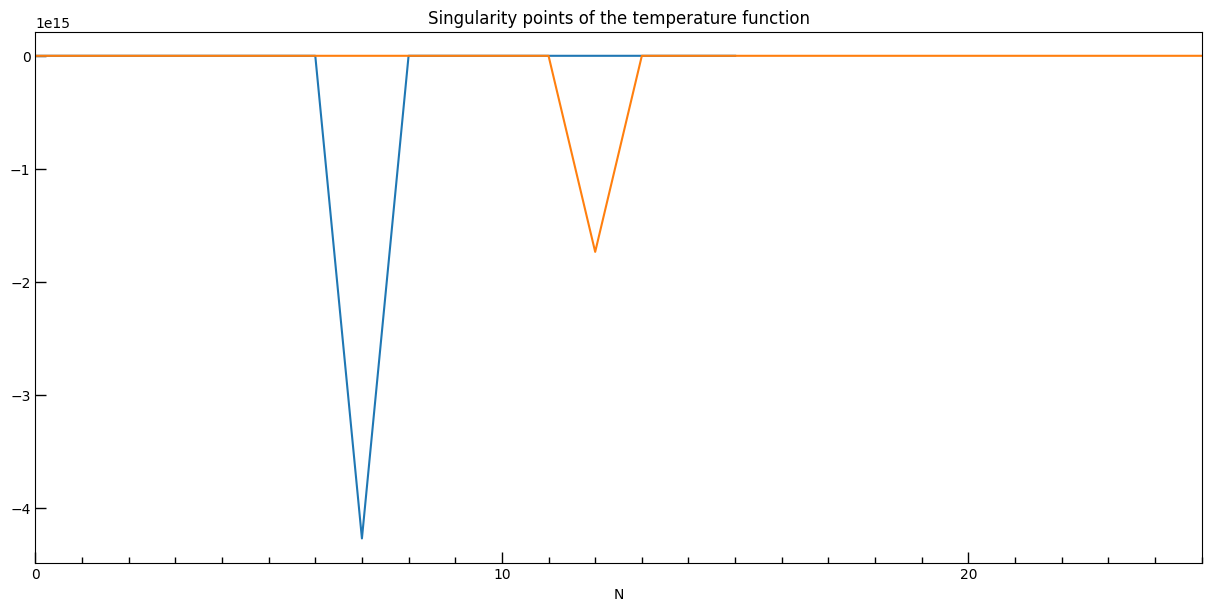

In [6]:
n_test_1 = np.arange(0, 16, 1)
n_test_2 = np.arange(0, 26, 1)

fig, ax = plt.subplots(figsize=[12, 6], constrained_layout=True)

ax.plot(n_test_1, temperature(entropy(15)))
ax.plot(n_test_2, temperature(entropy(25)))

ax.title.set_text("Singularity points of the temperature function")

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(direction='in', which='both', width=1)
ax.tick_params(which='major', length=8)
ax.tick_params(which='minor', length=4)
ax.set_xlabel("N")

plt.xlim(0, 25)